# Mezcla de VA

En forma genérica, tenemos $M$ una VA discreta llamada mezcladora, que toma valores $\{1,\dots,m\}$, y $W_1,\dots,W_m$ son VAs continuas o discretas. Además $M$ es independiente de cada $W_i$.

Luego definimos $Y$ una nueva VA que es mezcla de las $W_i$ mediante la variable mezcladora $M$:



$$Y = \left\{\begin{array}{ll}
              W_1 & \textrm{si } M=1\\
              \vdots & \vdots\\
              W_m & \textrm{si } M=m
            \end{array}\right. \rightarrow Y|_{M=m} = W_m
            $$

Gráficamente podemos representar a $Y$ con el siguiente esquema.

<img src="mezcladora.png" style="width:150px">

La variable $Y$ es la salida de un multiplexor o selector de datos. Las variables $\{W_1,...,W_m\}$ son las entradas, y $M$ es la variable que controla la llave selectora. Al fijar el valor de $M$ se selecciona que entrada será tomada por $Y$. La posición de la llave selectora es independiente de los valores de las entradas.

Supongamos que las $W_i$ son VA continuas, entonces $Y$ es una VA continua ¿cuánto vale $f_Y(y)$?

La función de distribución de $Y$ es:

$$
\begin{aligned}
F_Y(y) &= \mathbb{P}[Y\leq y] \\
&=\sum_{i=1}^m \mathbb{P}[Y\leq y | M=i] \, \mathbb{P}[M = i]\\
&=\sum_{i=1}^m \mathbb{P}[W_i\leq y] \, \mathbb{P}[M = i]\\
&= \sum_{i=1}^m F_{W_i}(y)\, \mathbb{P}[M=i]
\end{aligned}
$$

Como además supusimos que las $W_i$ son continuas:

$$
f_Y(y) = \sum_{i=1}^m f_{W_i}(y)\, \mathbb{P}[M=i]
$$

### ¿Cuánto vale la media de la VA mezcla?

Por definición de esperanza de una VA:

$$
\begin{aligned}
\mathbb{E}[Y] &= \int_{-\infty}^{\infty} y\, f_Y(y) dy = \int_{-\infty}^{\infty} y\, \sum_{i=1}^m f_{W_i}(y)\, \mathbb{P}[M=i] dy\\
&= \sum_{i=1}^m \left(\int_{-\infty}^{\infty} y\,  f_{W_i}(y)\, dy\right) \mathbb{P}[M=i]\\
&= \sum_{i=1}^m \mathbb{E}[W_i] \mathbb{P}[M=i]
\end{aligned}
$$

### ¿Cuánto vale la varianza de la VA mezcla?

De acuerdo con el Teorema de Pitágoras: $\mathbb{VAR}[Y] = \mathbb{VAR}[\mathbb{E}[Y|M]]+\mathbb{E}[\mathbb{VAR}[Y|M]]$. Usando esto:

$$
\mathbb{VAR}[Y] = \sum_{i=1}^{m} \mathbb{VAR}[W_i] \mathbb{P}[M=i] + \sum_{i=1}^{M} \left(\mathbb{E}[W_i]-\mathbb{E}[Y]\right)^2\, \mathbb{P}[M=i]
$$

Veamos esto aplicado a un ejemplo...


# Ejemplo: Canal Aditivo Gaussiano (AGN) (ver Ej. 4 de la guia 1)

Se envía un símbolo $X$ por un canal de comunicaciones. El símbolo puede tomar dos valores: 1 ó 0. El efecto del canal de comunicaciones lo representamos como un ruido $N$ que se suma al símbolo enviado. El resultado es $Y$.

Vamos a modelar la información enviada como VA Bernoulli $X \sim Ber(p)$, con parámetro $p=0.5$:

$$X = \left\{\begin{array}{ll}
              0 & \textrm{con } p_X=1-p\\
              1 & \textrm{con } p_X=p
            \end{array}\right.
            $$

Por otro lado, vamos a representar al canal de comunicaciones como $N \sim \mathcal{N}(0,\sigma^2_N)$ con $\sigma_N^2 = 0.1$. $X$ y $N$ son VA independientes. La salida del canal de comunicaciones en el receptor es una VA $Y = X + N$.

<img src="canal.png" style="width:200px">
Este canal recibe el nombre de Canal Aditivo Gaussiano, porque el efecto del canal es la adición de un ruido cuya distribución es gaussiana.

A continuación, obtenemos la función de densidad de probabilidad (fdp) de $Y$ a partir de la noción de mezcla (ver Ej. 4 de la guia 1).

## Resolución:

Primero veamos cómo este problema se interpreta como una mezcla.  Escribimos la densidad de la variable recibida usando condicionales, como en la explicación de mezcla que acabamos de ver:
$$f_Y(y) = f_{Y|X = 1}(y) p_X(1) + f_{Y|X=0} (y) p_X(0).$$

Luego en la condicional podemos reemplazar a $Y$ como $Y=X+N$, es decir, por ejemplo:
$$f_{Y|X=1} (y) = f_{X + N |X=1} (y).$$

Al condicionar a respecto de $X$ podemos reemplazar a $X$ por su valor en la expresión de $Y$ es decir:
$$f_{Y|X=0} (y) = f_{1 + N |X=1} (y) = f_{1 + N|X=1}(y).$$

Notar que hemos reemplazado el valor de $X$ pero hemos conservado la condicional $|X=1$, que implica que estamos considerando la distribución de $N+1$ condiciononal a que $X=1$. 

A continuación usamos que el ruido $N$ y el símbolo transmitido $X$ son independientes, es decir:
$$f_{1 + N|X=1}(y) = f_{1+N}.$$

De esta forma vemos que:
$$f_Y(y) = f_{N+1}(y) p_X(1) + f_N(y) p_X(0),$$
y aca se ve la mezcla. La VA $X$ actúa como la mezcladora, mientras que las variables a la entrada del selector son $N$ y $N+1$, es decir:
<img src="mezcladora2.png" style="width:200px">


Una vez que identificamos a este modelo como una mezcla, conocemos automáticamente su densidad, media y varianza, y podemos extraer otras conclusiones que se derivan del modelo de mezcla.

A continuación, validaremos las expresiones halladas mediante una simulación. Lo primero que podemos hacer es obtener realizaciones de $Y$ y con éstas generar un histograma.

In [8]:
# Importamos las librerias que vamos a usar
import math as m
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
N = 10000
p = 0.5
sigma2_N = 0.1
y = np.array([])

In [3]:
for _ in range(N):
    # realizaciones de X
    x  = np.random.binomial(1,p)
    # realizaciones de N0 ~ N(0,sigma2)
    n0 = np.random.randn()*sigma2_N
    # realizaciones de N0 ~ N(1,sigma2)
    n1 = np.random.randn()*sigma2_N+1
    # if x:
    #     y = np.append(y,w1)
    # else:
    #     y = np.append(y,w0)
    y = np.append(y, n0 if x else n1)

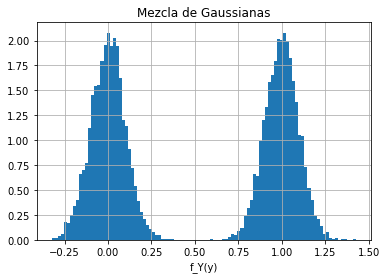

In [4]:
plt.figure()
n, bins, patches = plt.hist(y,100,density=True)
plt.xlabel('y')
plt.xlabel('f_Y(y)')
plt.title('Mezcla de Gaussianas')
plt.grid(True)

Veamos si analíticamente llegamos al mismo resultados...

Según lo que vimos al principio: 
$$
\begin{aligned}
f_Y(y) &= \sum_{x = 0}^{1} \, f_{Y|X=x}(y) \, \mathbb{P}[X=x]\\
&= \sum_{x = 0}^{1} \, f_{X+N|X=x}(y) \, \mathbb{P}[X=x]\\
&= f_{N}(y) \, (1-p) + f_{N+1}(y) \, p\\
\end{aligned}
$$

Recordemos que $Y=X+N$ y que $X$ puede tomar sólo dos valores ($\{0,1\}$. La VA Y dado que X=0 ($Y|X=0$) se distribuye como $N$ es decir: $Y|X=0 \sim \mathcal{N}(0,\sigma^2_N)$. Por otro lado, la VA $Y$ dado que $X=1$ se distribuye como $N+1$, es decir, le cambia la media a la gaussiana: $Y|X=1 \sim \mathcal{N}(1,\sigma^2_N)$.

Esto último nos permite escribir la fdp de $Y$ como ...

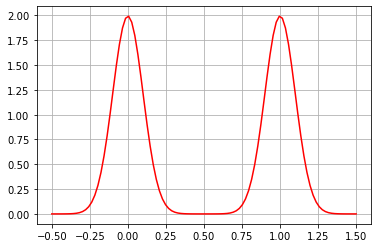

In [5]:
y = np.linspace(-0.5,1.5,100)
fy1 = st.norm.pdf(y,0,0.1) # N(0,0.1)
fy2 = st.norm.pdf(y,1,0.1) # N(1,0.1)
plt.plot(y,fy1*(1-p)+fy2*p,'r-')
plt.grid()

# Ejercicio

1) Extienda el ejemplo anterior para el caso en que la variable $X$ puede tomar $n$ valores $x_1,...,x_n$, hallando la densidad de la señal recibida $Y$.

2) Considere el caso particular en que los valores posibles son $\{-2, -1, 1, 2\}$ con probabilidades $1/4$ cada uno. Realice una simulación donde compare la densidad teórica con lo obtenido por simulación.4 ¿Cómo cambia la densidad si los valores de $X$ no son equiprobables?
